# CREDIT CARD FRAUD DETECTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


# Importing Required Libraries

In [2]:
# Importing essential libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Loading the Dataset

In [3]:
# Load the training dataset from uploaded files
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')  # Adjust path if needed

# Display first 5 rows of the dataset
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Basic Info and Null Check

In [4]:
# Check the structure of dataset and missing values
df.info()

# Check for missing/null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# EDA - Target Column Distribution

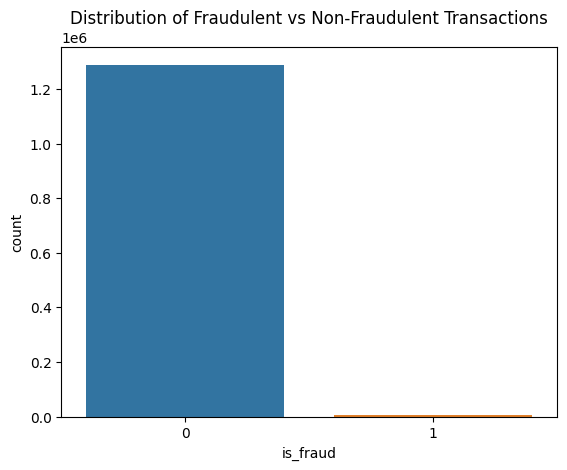

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [5]:
# Check the distribution of fraud and non-fraud transactions
sns.countplot(data=df, x='is_fraud')
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.show()

# Print class balance
fraud_percent = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percent)


#  Dropping Unnecessary Columns

In [7]:
# Drop columns that are identifiers or personal info and not useful for model
df = df.drop([ 'cc_num', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'unix_time', 'merch_lat', 'merch_long'], axis=1)

df.head()


,Unnamed: 0,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,is_fraud
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,0
2,2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0
3,3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,0
4,4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0


# Encoding Categorical Columns

In [8]:
# Convert categorical columns to numeric using Label Encoding
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Unnamed: 0,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,is_fraud
0,0,514,8,4.97,0,36.0788,-81.1781,3495,370,56438,0
1,1,241,4,107.23,0,48.8878,-118.2105,149,428,159395,0
2,2,390,0,220.11,1,42.1808,-112.2620,4154,307,818703,0
3,3,360,2,45.00,1,46.2306,-112.1138,1939,328,544575,0
4,4,297,9,41.96,1,38.4207,-79.4629,99,116,831111,0


#  Defining Features and Target

In [9]:
# Define input features and target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Training & Evaluation

**1.Logistic Regression**

In [15]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("classification report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9936992692849018
classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



**2.Decision Tree**

In [17]:
# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("classification report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9958277903098309
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.63      0.68      0.65      1501

    accuracy                           1.00    259335
   macro avg       0.81      0.84      0.83    259335
weighted avg       1.00      1.00      1.00    259335



**3. Random Forest**

In [18]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("classification report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9974473171766248
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.86      0.67      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.83      0.88    259335
weighted avg       1.00      1.00      1.00    259335



# Best Model Conclusion

In [19]:
# Compare accuracy scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", acc_lr)
print("Decision Tree Accuracy:", acc_dt)
print("Random Forest Accuracy:", acc_rf)

# Print best model
best_model = max([('Logistic Regression', acc_lr), ('Decision Tree', acc_dt), ('Random Forest', acc_rf)], key=lambda x: x[1])
print("Best Performing Model:", best_model[0], "with Accuracy:", round(best_model[1]*100, 2), "%")


Logistic Regression Accuracy: 0.9936992692849018
Decision Tree Accuracy: 0.9958277903098309
Random Forest Accuracy: 0.9974473171766248
Best Performing Model: Random Forest with Accuracy: 99.74 %


In [2]:
from IPython.display import FileLink, display

# Replace with your actual file name
file_path = 'sms_spam_detection_kaggle.ipynb'  # or any other file like 'results.csv'

# Generate download link
display(FileLink(file_path))


/kaggle/working/sms_spam_detection_kaggle.ipynb